In [130]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# 4

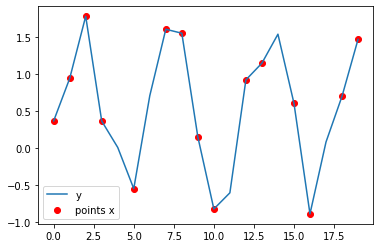

In [160]:
n = 20
X_axis = np.linspace(0, n, n, False)
y = np.sin(np.linspace(0, n, n)) + np.random.random(n)
Gamma = np.linspace(0, n, n, False).astype(int)
Gamma = np.random.permutation(Gamma)[:15]

plt.plot(X_axis, y, label="y")
plt.scatter(Gamma, y[Gamma], label="points x", c="r")
plt.legend()
plt.show()

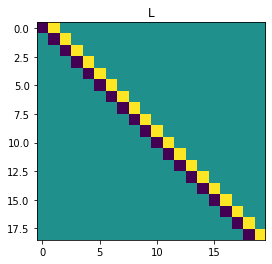

In [161]:
L = np.eye(n - 1, n, 1) - np.eye(n - 1, n)
plt.imshow(L)
plt.title("L")
plt.show()

In [162]:
x_cvx = cp.Variable(n)
objective = cp.Minimize(cp.norm(L @ x_cvx, 1))
constraints = [x_cvx[Gamma] == y[Gamma]]
prob = cp.Problem(objective, constraints)
result = prob.solve(solver=cp.ECOS)

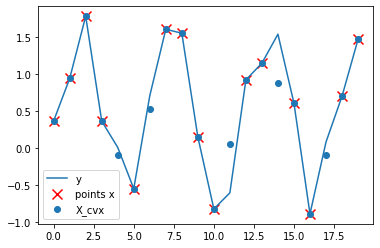

In [163]:
plt.plot(X_axis, y, label="y")
plt.scatter(Gamma, y[Gamma], s=100, label="points x", c="r", marker="x")
plt.scatter(X_axis, x_cvx.value, label="X_cvx")
plt.legend()

$$
\begin{align*}\\
& \min ||z||_1 \quad
s.t \quad z =Lx \quad x(\Omega) = y(\Omega)\\

& L = ||z||_1 + \gamma^T (x(\Omega) - y(\Omega)) + \lambda^T (z-Lx)\\
& g = -\sup_z(-\lambda^T z-||z||_1) +\inf_x(-\lambda^T Lx+\gamma^T (x(\Omega) - y(\Omega)))\\
& \text{for } x(\Omega)\text{ we already have solution } = y(\Omega)\\
& \text{but for non $\Omega$ we have not. lets denote them as $x_+$}\\

& g = 0 -\lambda^T(\Omega)L y(\Omega) + \inf(-\lambda^T Lx_+) \quad if (|\lambda|_\infty < 1)\\
& \text{the last term is }-\infty \text{ dont know what to do}
\end{align*}
$$
